In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def getDataFrame(log_file_path):

    # Read the log file
    with open(log_file_path, 'r') as file:
        logs = file.read()

    pattern = r"Epoch (\d+)/\d+\n.*accuracy: ([\d.]+).*val_accuracy: ([\d.]+)"

    # Find all matches
    matches = re.findall(pattern, logs)

    # Create DataFrame
    df = pd.DataFrame(matches, columns=['epoch', 'train_accuracy', 'val_accuracy'])

    # Convert columns to appropriate data types
    df['epoch'] = df['epoch'].astype(int)
    df['train_accuracy'] = df['train_accuracy'].astype(float)
    df['val_accuracy'] = df['val_accuracy'].astype(float)

    # Display the DataFrame
    return df

In [3]:
def plotEpochData(df1, df2, df3, title1, title2, title3, figure):
    dataframes = [df1, df2, df3]
    titles = [title1, title2, title3]
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

    # Plot each DataFrame in a separate subplot
    for i, df in enumerate(dataframes):
        axes[i].plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', color='blue', marker='o')
        axes[i].plot(df['epoch'], df['val_accuracy'], label='Val Accuracy', color='orange', marker='x')
        axes[i].set_title(f'Model Accuracy for model with {titles[i]}% corruption')  # Title for each subplot
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Accuracy')
        axes[i].legend(loc='lower right')  # Legend placement
        
        # Optional: Set limits for better visualization
        axes[i].set_ylim(0.8, 1)  # Assuming accuracies are between 0.8 and 1, adjust as needed

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.savefig(figure, bbox_inches='tight')
    plt.show()

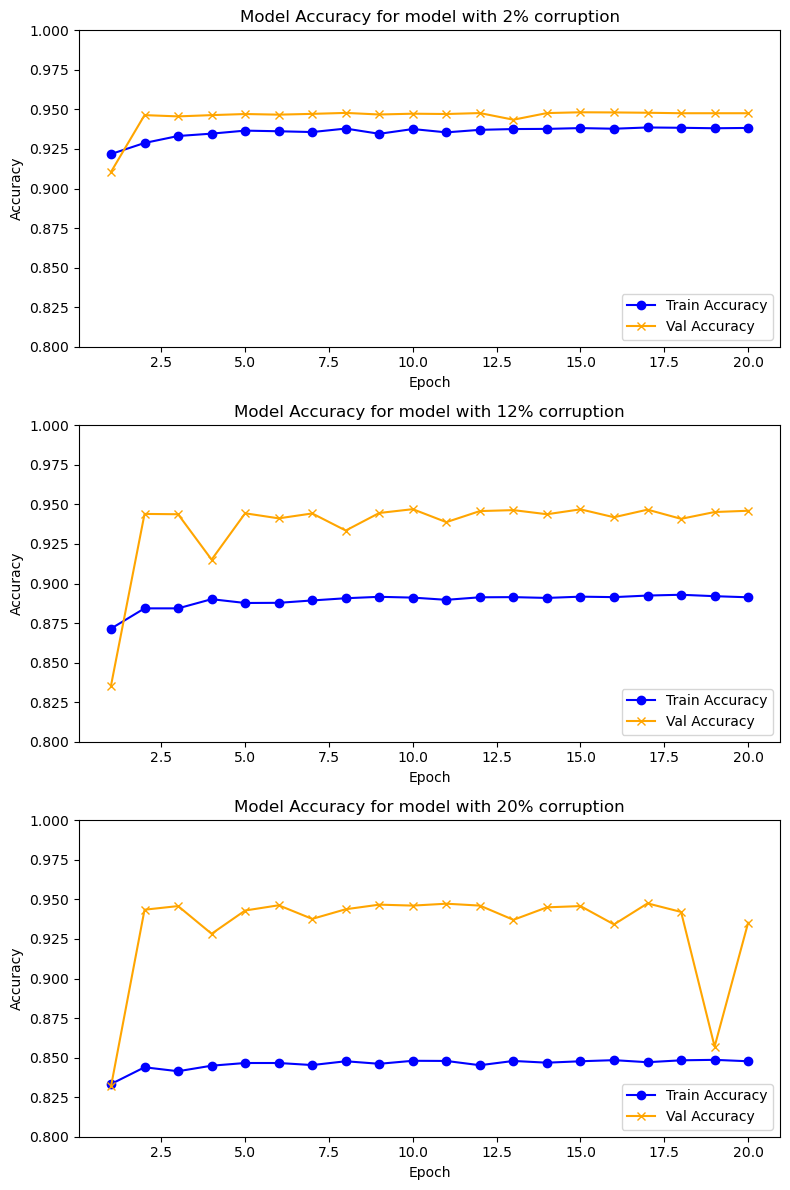

In [4]:
small_df = getDataFrame("./Training_Logs/Training_logs_2.txt")
large_df = getDataFrame("./Training_Logs/Training_logs_12.txt")
large_22_df = getDataFrame("./Training_Logs/Training_logs_20.txt") 

plotEpochData(small_df, large_df, large_22_df, "2", "12", "20", "Epoch.png")